# 붓꽃 데이터 분석

In [1]:
## 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기


In [4]:
# 파일경로 설정
file_path = '/content/drive/MyDrive/데이터분석/데이터/iris_dataset.csv'

# pd.read_csv 사용
df_iris = pd.read_csv(file_path)

# 결과 확인하기
print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

## 데이터 전처리

### 누락데이터 처리

In [13]:
# 각 컬럼별 누락데이터의 수 확인
num_nulls = df_iris.isnull().sum()

# 결과
print(f'각 컬럼별 누락 데이터의 수 : \n{num_nulls}')

각 컬럼별 누락 데이터의 수 : 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64



### 이상치 처리


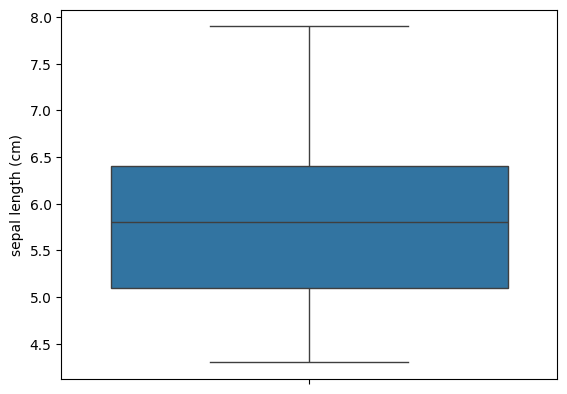

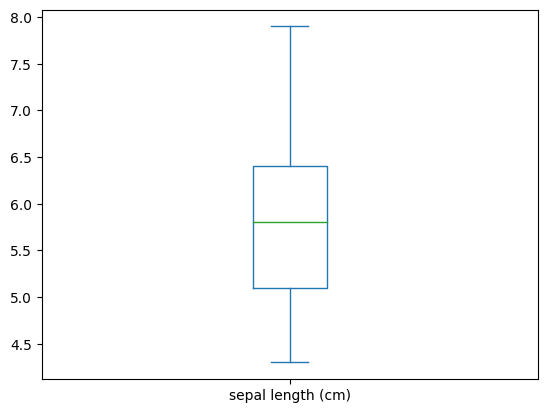

In [24]:
### boxplot --> 컬럼별 이상치 유무 확인

# 꽃받침의 길이 컬럼
sns.boxplot(data = df_iris, y = 'sepal length (cm)')
plt.show()
df_iris.loc[:,'sepal length (cm)'].plot(kind = 'box')
plt.show()

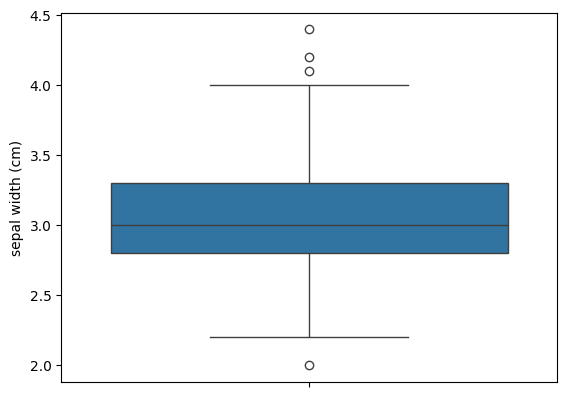

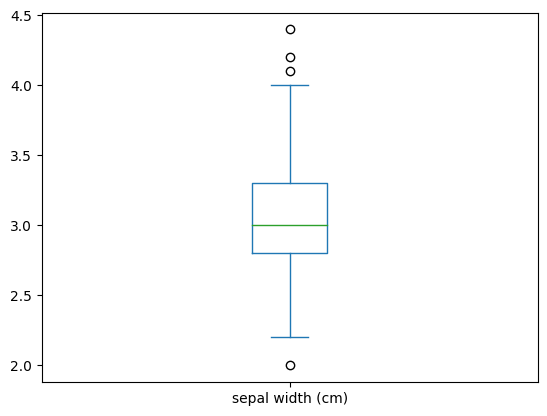

In [25]:
# 꽃받침의 너비 컬럼
sns.boxplot(data = df_iris, y = 'sepal width (cm)')
plt.show()
df_iris.loc[:,'sepal width (cm)'].plot(kind = 'box')
plt.show()

# 박스 그래프에서 이상치가 있음을 확인할 수 있음.

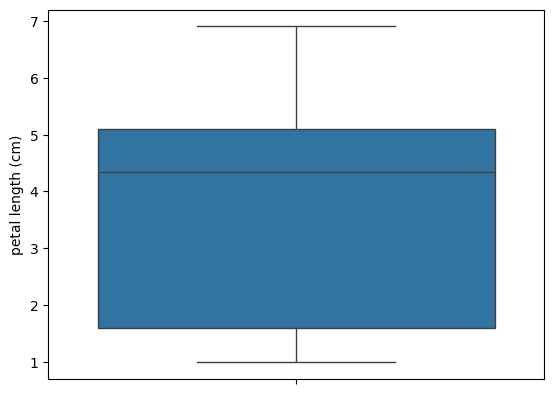

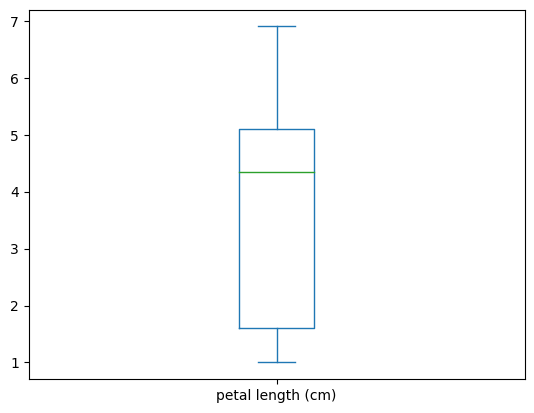

In [27]:
# 꽃잎의 길이 컬럼
sns.boxplot(data = df_iris, y = 'petal length (cm)')
plt.show()
df_iris.loc[:,'petal length (cm)'].plot(kind = 'box')
plt.show()

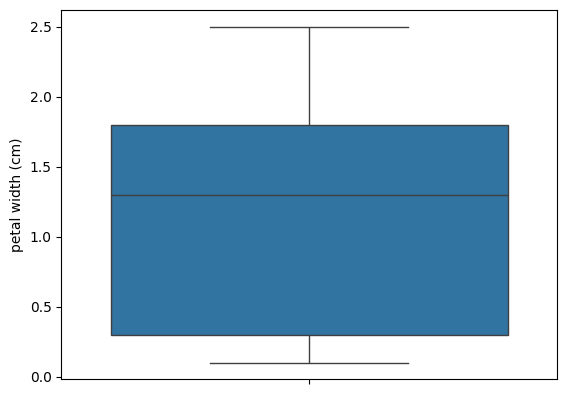

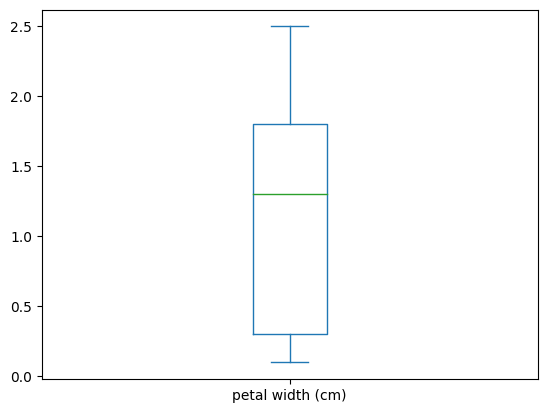

In [28]:
# 꽃잎의 너비 컬럼
sns.boxplot(data = df_iris, y = 'petal width (cm)')
plt.show()
df_iris.loc[:,'petal width (cm)'].plot(kind = 'box')
plt.show()

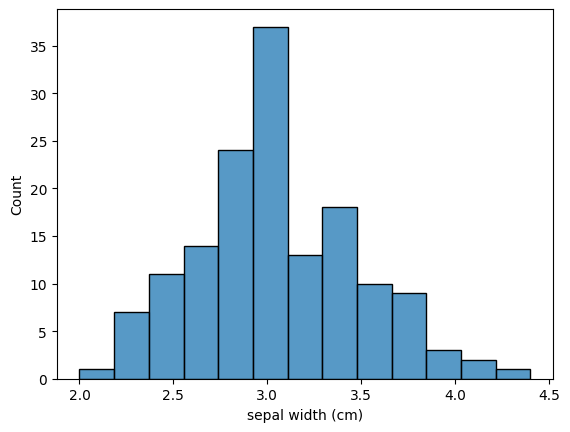

--------------------------------------------------------------------------------
sepal width 컬럼의 1사분위 값 : 2.8
--------------------------------------------------------------------------------
sepal width 컬럼의 3사분위 값 : 3.3
--------------------------------------------------------------------------------
sepal width 컬럼의 iqr = 0.5
--------------------------------------------------------------------------------
sepal width 컬럼의 정상범위의 최소값 : 2.05
--------------------------------------------------------------------------------
sepal width 컬럼의 정상범위의 최대값 : 4.05


In [36]:
### sepal width 컬럼에 대한 이상치 처리(제거)

sns.histplot(data = df_iris, x = 'sepal width (cm)')  # 정규분포인지를 보기 위해서 histplot을 찍어본다.
plt.show()
print('-'*80)

# 1사분위 / 3사분위 추출
q1 = df_iris.loc[:,'sepal width (cm)'].quantile(q = 0.25)
q3 = df_iris.loc[:,'sepal width (cm)'].quantile(q = 0.75)
print(f'sepal width 컬럼의 1사분위 값 : {q1}')
print('-'*80)
print(f'sepal width 컬럼의 3사분위 값 : {q3}')
print('-'*80)

# iqr 추출
iqr = q3 - q1
print(f'sepal width 컬럼의 iqr = {iqr}')
print('-'*80)

# 정상범위의 최소/최대 값 추출
min = q1 - (iqr * 1.5)
max = q3 + (iqr * 1.5)
print(f'sepal width 컬럼의 정상범위의 최소값 : {min}')
print('-'*80)
print(f'sepal width 컬럼의 정상범위의 최대값 : {max}')

In [37]:
df_iris.loc[:,'sepal width (cm)'].describe()
# 실제 데이터의 min, max와 iqr로 계산한 min, max 확인

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [54]:
# 이상치 데이터의 인덱스 추출
condition = (df_iris.loc[:, 'sepal width (cm)'] < min) | (df_iris.loc[:,'sepal width (cm)'] > max)
print(f'sepal width 컬럼의 이상치에 대한 불리언 배열 : \n{condition}')
print('-'*80)
print(df_iris.loc[:,'sepal width (cm)'].loc[condition])
# df_iris.loc[condition,'sepal width (cm)']  강사는 바로 위의 줄과 같이 썼으나 이렇게도 가능
print('-'*80)
outlier_index = df_iris.loc[:,'sepal width (cm)'].loc[condition].index
print(f'sepal width 컬럼의 이상치 데이터의 인덱스 : \n{outlier_index}')

sepal width 컬럼의 이상치에 대한 불리언 배열 : 
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal width (cm), Length: 150, dtype: bool
--------------------------------------------------------------------------------
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64
--------------------------------------------------------------------------------
sepal width 컬럼의 이상치 데이터의 인덱스 : 
Index([15, 32, 33, 60], dtype='int64')


In [62]:
### 이상치 데이터 제거
df_cleaned = df_iris.drop(index = outlier_index)
print(df_cleaned)

#df.drop은 ignore_index가 없어서 이를 재설정
df_cleaned.reset_index(drop = True, inplace = True)  # drop = True는 기존의 index를 보관하지 않고 사라진다.
print(df_cleaned)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

         label  
0       se

## 데이터 탐색(EDA)

In [97]:
## 붓꽃품종 --> 종류별 개수 확인 --> '정답' 분포 확인(균형 또는 불균형)

# 이상치 제거 전 품종별 빈도수 추출
counts_before = df_iris.loc[:,'label'].value_counts()
print(f'이상치 제거 전 붓꽃 데이터의 품종별 개수: \n{counts_before}')

# 이상치 제거 후 품종별 빈도수 추출
counts_after = df_cleaned.loc[:,'label'].value_counts()
print(f'이상치 제거 전 붓꽃 데이터의 품종별 개수: \n{counts_after}')

이상치 제거 전 붓꽃 데이터의 품종별 개수: 
label
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
이상치 제거 전 붓꽃 데이터의 품종별 개수: 
label
virginica     50
versicolor    49
setosa        47
Name: count, dtype: int64


### 특성별 품종 간의 차이 시각화

#### 꽃받침의 길이와 품종간의 차이 시각화

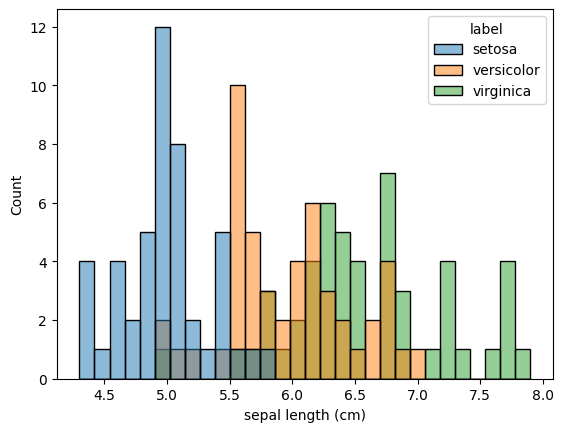

In [76]:
### 꽃받침의 길이 분포

# sns.histplot() 사용
sns.histplot(data = df_cleaned, x='sepal length (cm)', hue = 'label', bins = 30)
plt.show()
# 아래 그래프에서 보듯이 꽃받침의 길이가 6.0 cm라고 하면 이는 versicolor라고 할 수는 없다.
# 즉 이 특성 한개로 품종을 판단하기는 어렵다.

#### 꽃받침의 너비와 품종간의 차이 시각화

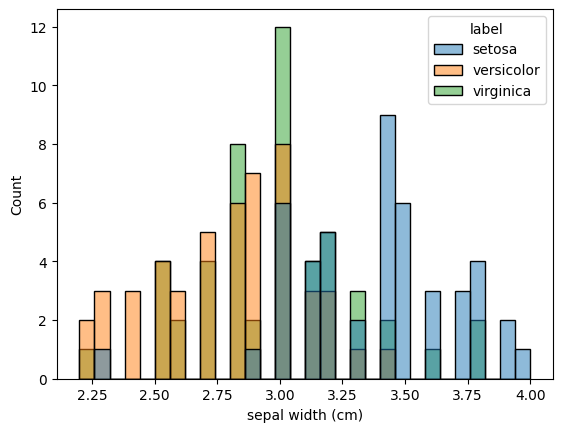

In [75]:
### 꽃받침의 너비 분포

# sns.histplot() 사용
sns.histplot(data = df_cleaned, x='sepal width (cm)', hue = 'label', bins = 30)
plt.show()

#### 꽃잎의 길이와 품종간의 차이 시각화

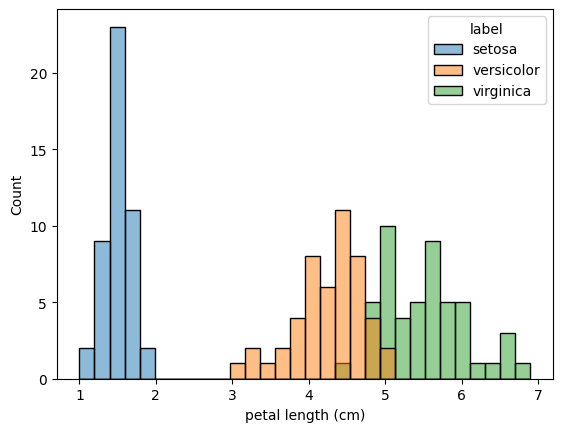

In [79]:
### 꽃잎의 길이  분포

# sns.histplot() 사용
sns.histplot(data = df_cleaned, x='petal length (cm)', hue = 'label', bins = 30)
plt.show()

#### 꽃잎의 너비 품종간의 차이 시각화

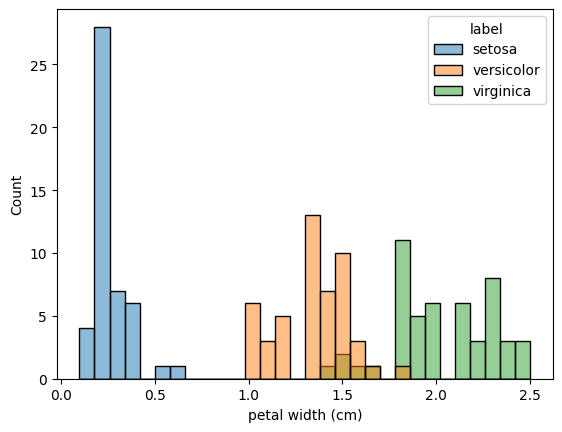

In [80]:
### 꽃잎의 너비  분포

# sns.histplot() 사용
sns.histplot(data = df_cleaned, x='petal width (cm)', hue = 'label', bins = 30)
plt.show()

#### 꽃잎의 길이와 꽃잎의 너비를 이용한 품종 간의 차이 시각화

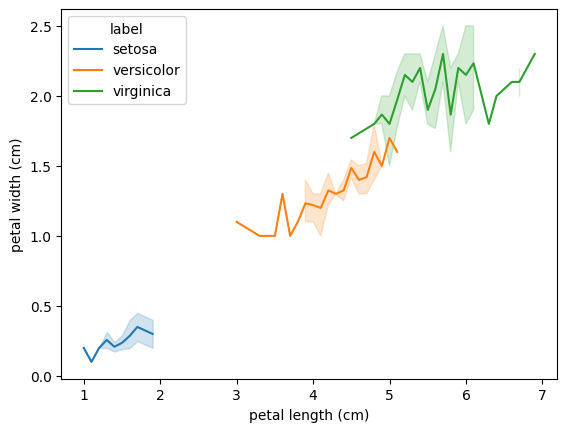

--------------------------------------------------------------------------------


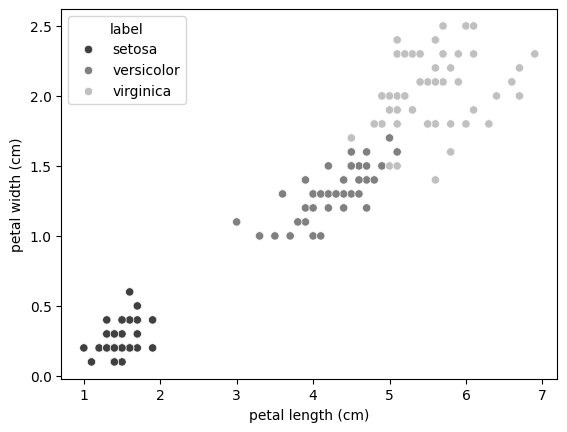

In [94]:
### lineplot 적용
sns.lineplot(data = df_cleaned, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'label')
plt.show()

print('-'*80)
### scatterplot 적용
sns.scatterplot(data = df_cleaned, x = 'petal length (cm)', y = 'petal width (cm)', hue = 'label', palette = 'gray')
plt.show()

#### 꽃받침의 너비와 꽃받침의 길이를 이용한 품종 간의 차이 시각화

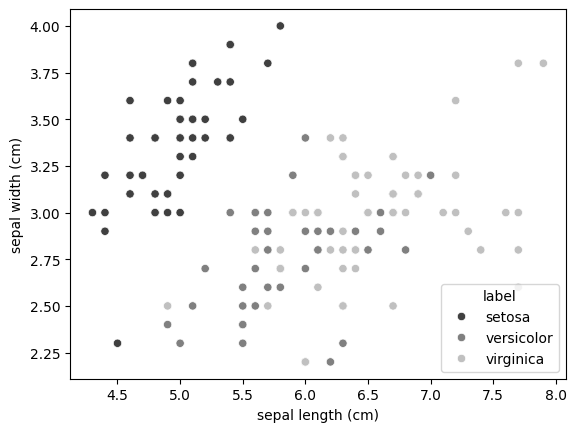

In [98]:
### scatterplot 적용
sns.scatterplot(data = df_cleaned, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'label', palette = 'gray')
plt.show()